In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

In [4]:
replay_info = xr.open_mfdataset('../Processed-Data/*.nc', group='/replay_info').to_dataframe()

In [7]:
replay_info.head()

,ripple_number,start_time,end_time,animal,day,epoch,ripple_duration,predicted_state,predicted_state_probability,replay_task,...,is_correct,turn,x_position,y_position,head_direction,speed,linear_distance,linear_position,lagged_linear_distance,replay_motion
index,,,,,,,,,,,,,,,,,,,,,
0,1,01:37:52.818600,01:37:52.931267,HPa,1,4,00:00:00.112666,Unclassified,NaN,Unclassified,...,False,,98.15,102.05000,0.630589,0.269463,0.00000,NaN,0.000000,Towards
1,2,01:37:53.860600,01:37:53.897933,HPa,1,4,00:00:00.037333,Unclassified,NaN,Unclassified,...,False,,98.80,101.40000,0.635027,0.339654,0.00000,NaN,0.000000,Towards
2,3,01:37:58.821267,01:37:58.908600,HPa,1,4,00:00:00.087333,Unclassified,NaN,Unclassified,...,False,,101.40,99.45000,0.701833,0.951546,0.00000,NaN,0.000000,Towards
3,4,01:38:06.327934,01:38:06.452601,HPa,1,4,00:00:00.124666,Unclassified,NaN,Unclassified,...,False,,96.20,94.40891,1.534846,0.962924,1.60855,NaN,1.595583,Towards
4,5,01:38:13.744601,01:38:13.871268,HPa,1,4,00:00:00.126666,Inbound-Forward,0.823523,Inbound,...,False,,100.75,92.30000,0.134962,2.333202,3.56548,NaN,3.565480,Towards


In [12]:
replay_info.columns

Index(['ripple_number', 'start_time', 'end_time', 'animal', 'day', 'epoch',
       'ripple_duration', 'predicted_state', 'predicted_state_probability',
       'replay_task', 'replay_order', 'session_time',
       'number_of_unique_spiking', 'number_of_spikes', 'labeled_segments',
       'from_well', 'to_well', 'task', 'is_correct', 'turn', 'x_position',
       'y_position', 'head_direction', 'speed', 'linear_distance',
       'linear_position', 'lagged_linear_distance', 'replay_motion'],
      dtype='object')

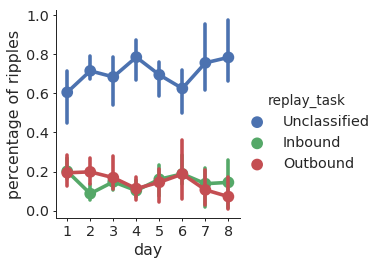

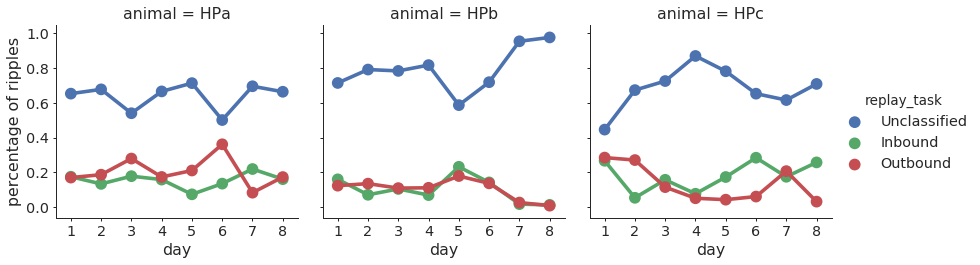

In [11]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

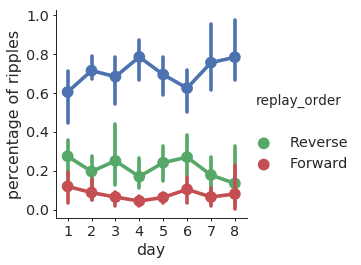

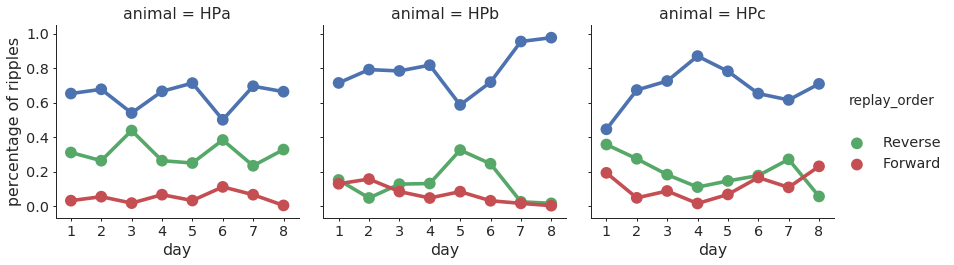

In [13]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

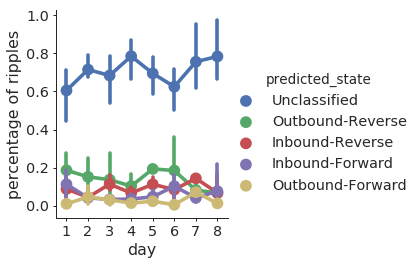

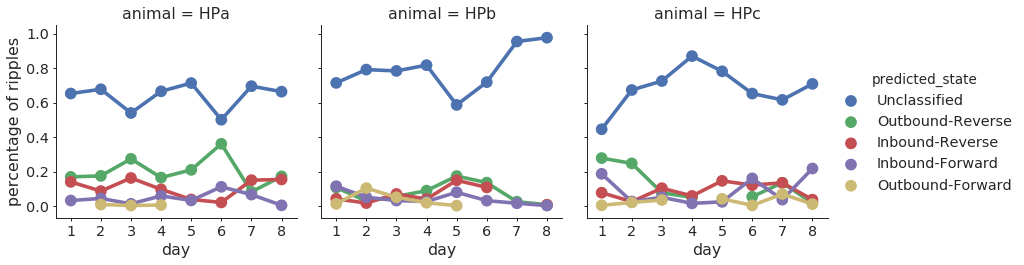

In [14]:
covariate = 'predicted_state'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

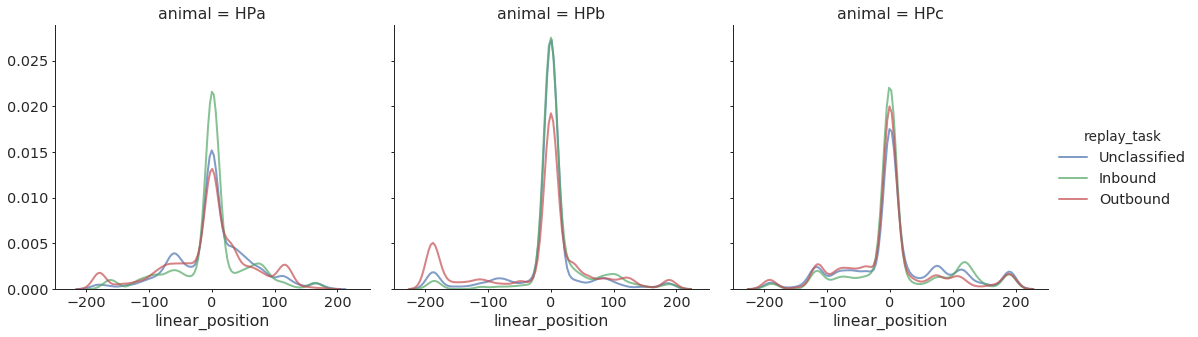

In [16]:
covariate = 'replay_task'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


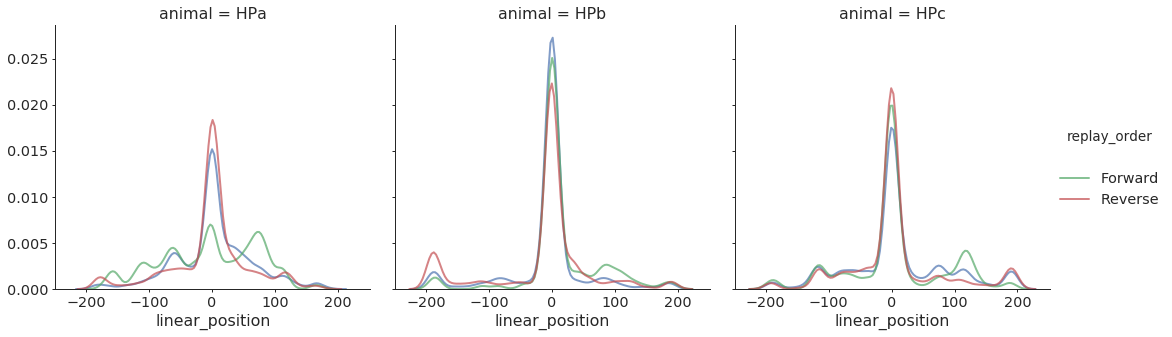

In [17]:
covariate = 'replay_order'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

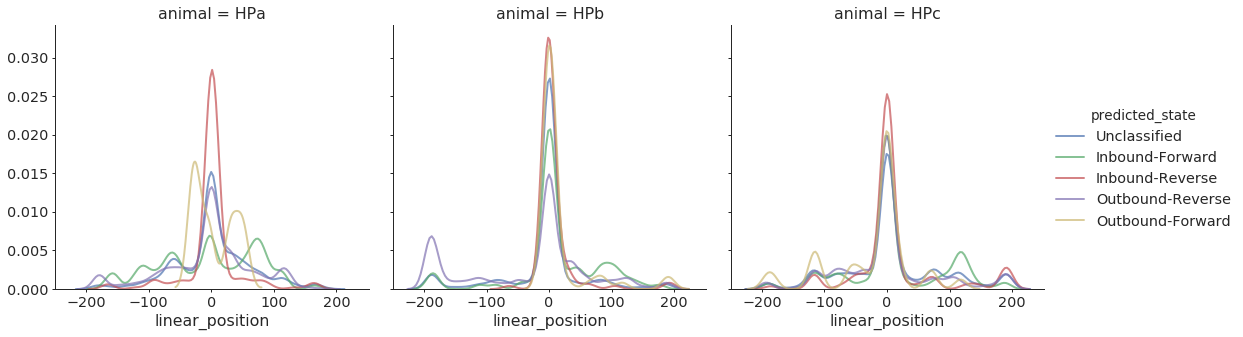

In [18]:
covariate = 'predicted_state'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

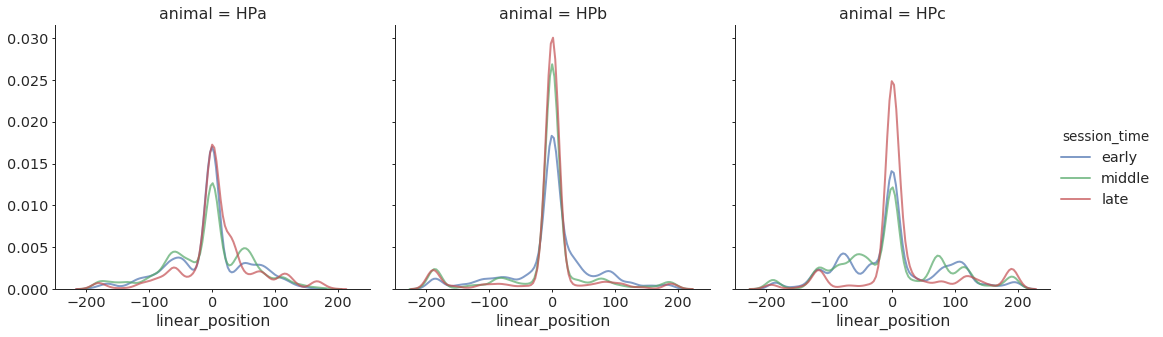

In [19]:
covariate = 'session_time'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5)
g.map(sns.kdeplot, 'linear_position', alpha=0.7, bw=10);
g.add_legend();

In [3]:
spike_coherence = xr.open_mfdataset(
    '../Processed-Data/*.nc',
    group='all_ripples/spike_spike_coherence',
    concat_dim='session')
spike_coherence

<xarray.Dataset>
Dimensions:               (frequency: 188, neuron1: 1374, neuron2: 1374, session: 48, time: 4)
Coordinates:
  * neuron1               (neuron1) object 'HPa_01_04_001_001' ...
  * neuron2               (neuron2) object 'HPa_01_04_001_001' ...
  * time                  (time) float64 -0.375 -0.125 0.125 0.375
  * frequency             (frequency) float64 0.0 4.0 8.0 12.0 16.0 20.0 ...
Dimensions without coordinates: session
Data variables:
    coherence_magnitude   (session, time, frequency, neuron1, neuron2) float64 dask.array<shape=(48, 4, 188, 1374, 1374), chunksize=(1, 4, 188, 1374, 1374)>
    coherence_difference  (session, time, frequency, neuron1, neuron2) float64 dask.array<shape=(48, 4, 188, 1374, 1374), chunksize=(1, 4, 188, 1374, 1374)>

In [4]:
from loren_frank_data_processing import make_neuron_dataframe
from src.parameters import ANIMALS

neuron_info = make_neuron_dataframe(ANIMALS)

In [ ]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
neuron_id1 = n.query('area == "PFC"').neuron_id.values
neuron_id2 = n.query('area == "CA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(25, 60),
    neuron1=neuron_id1, neuron2=neuron_id2)
coherence_difference.mean(['session', 'neuron1', 'neuron2']).plot()